In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [30]:
xArray1 = np.array([i for i in range(0, 1024, 1)])
yArray1 = np.zeros_like(xArray1)
for i in range(16):
    for j in range(16):
        yArray1 = yArray1 + np.loadtxt("../data/source1/B00001-2 B1 450S-S1-25025 - Pixel( " + str(i) + ", " + str(j) + ")" + ".txt", unpack=True)

In [31]:
xArray2 = np.array([i for i in range(0, 1024, 1)])
yArray2 = np.zeros_like(xArray2)
for i in range(16):
    for j in range(16):
        yArray2 = yArray2 + np.loadtxt("../data/source2/B00001-2 B1 600S-S2-25025 - Pixel( " + str(i) + ", " + str(j) + ")" + ".txt", unpack=True)

In [32]:
xArray3 = np.array([i for i in range(0, 1024, 1)])
yArray3 = np.zeros_like(xArray3)
for i in range(16):
    for j in range(16):
        yArray3 = yArray3 + np.loadtxt("../data/source3/B12345-2 B1 900S-S3-250225 - Pixel( " + str(i) + ", " + str(j) + ")" + ".txt", unpack=True)

In [33]:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

In [34]:
popt1, _ = curve_fit(gaussian, xArray1, yArray1, p0=[np.max(yArray1), np.argmax(yArray1), 10])
print(popt1)

[4887.08735144  270.34017056   14.97164181]


In [35]:
popt2, _ = curve_fit(gaussian, xArray2, yArray2, p0=[np.max(yArray2), np.argmax(yArray2), 10])
print(popt2)

[3508.42535838  110.14845202    8.29339402]


In [36]:
popt3, _ = curve_fit(gaussian, xArray3, yArray3, p0=[np.max(yArray3), 100, 10])
print(popt3)

[278.66245596 114.00428059   9.48040043]


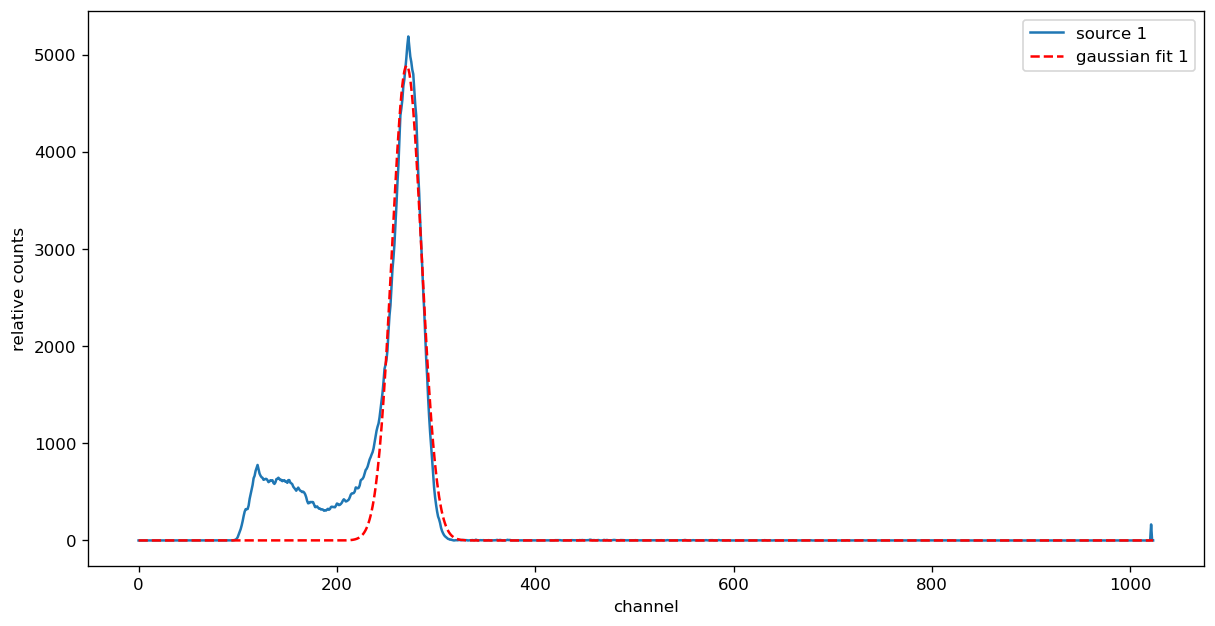

In [37]:
fitted_curve1 = gaussian(xArray1, *popt1)

plt.figure(dpi=120, figsize=(12, 6))

plt.plot(xArray1, yArray1, label="source 1")
plt.plot(xArray1, fitted_curve1, label="gaussian fit 1", color="r", linestyle="--")

plt.xlabel("channel")
plt.ylabel("relative counts")
plt.legend()
plt.show()

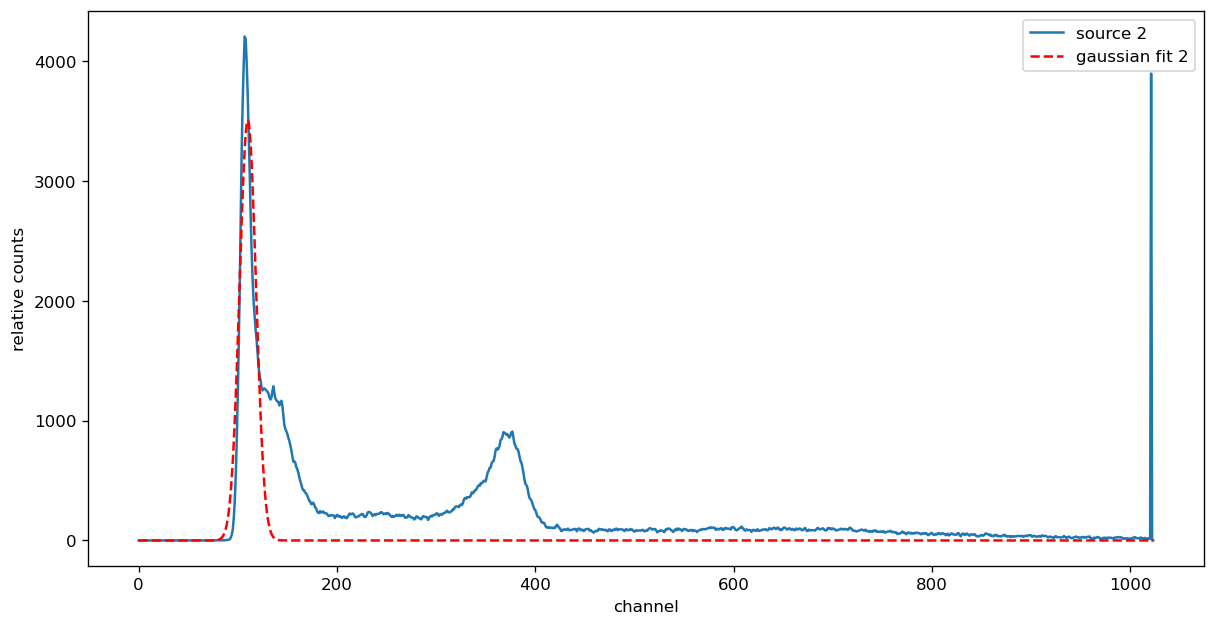

In [38]:
fitted_curve2 = gaussian(xArray2, *popt2)

plt.figure(dpi=120, figsize=(12, 6))

plt.plot(xArray2, yArray2, label="source 2")
plt.plot(xArray2, fitted_curve2, label="gaussian fit 2", color="r", linestyle="--")

plt.xlabel("channel")
plt.ylabel("relative counts")
plt.legend()
plt.show()

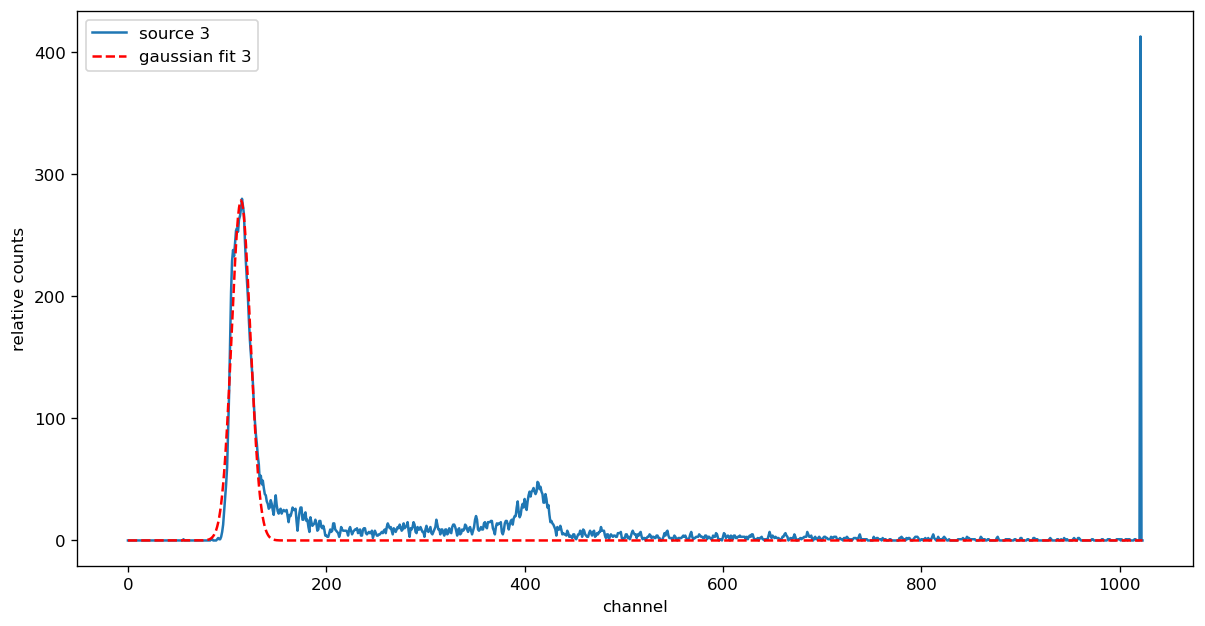

In [39]:
fitted_curve3 = gaussian(xArray3, *popt3)

plt.figure(dpi=120, figsize=(12, 6))

plt.plot(xArray3, yArray3, label="source 3")
plt.plot(xArray3, fitted_curve3, label="gaussian fit 3", color="r", linestyle="--")

plt.xlabel("channel")
plt.ylabel("relative counts")
plt.legend()
plt.show()